In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Member,Message
from agents import Group
from agent import Agent

 
[2024-12-10 17:41:55][INFO]: All agents are fully connected


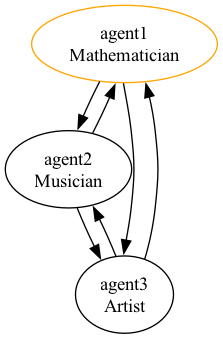

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Agent(name="agent3", role="Artist", description="Transfer to me if you need help with art.", dify_access_token=os.environ.get("AGENT3_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [4]:
g.group_messages.context
# g.current_agent

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [5]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
# print('-'*50)
# print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
# print('-'*50)
# print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-10 17:41:58][INFO]: handoff from agent1 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "4c982562-73cf-45b4-b7c5-706745d87cbf",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math."
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music."
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art."
            }
        ],
        "relationships": {
            "agent1": [
                "agent2",
            

In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-10 17:41:58][INFO]: no handoff needed, stay with agent2 judge by auto2 mode
 
[2024-12-10 17:42:02][INFO]: Call agent agent2
 
[2024-12-10 17:42:02][INFO]: Agent agent2 response: It looks like you're interested in music, particularly for reading. Music can greatly enhance the reading experience by creating a calming atmosphere and helping to improve focus. Here are some suggestions:

1. **Instrumental Music**: Genres like classical, jazz, or ambient music are excellent choices. Composers such as Johann Sebastian Bach or Erik Satie create pieces that are soothing and unobtrusive.

2. **Nature Sounds**: Tracks that incorporate sounds of nature, like rain or ocean waves, can provide a serene backdrop that aids concentration.

3. **Lo-fi Hip Hop**: This genre has gained popularity for its mellow beats and relaxing melodies, making it a perfect companion for reading.

4. **Soundtracks**: Instrumental film soundtracks can evoke emotions without distracting lyrics. Look for scores 

[Message(sender='agent2', action='talk', result="It looks like you're interested in music, particularly for reading. Music can greatly enhance the reading experience by creating a calming atmosphere and helping to improve focus. Here are some suggestions:\n\n1. **Instrumental Music**: Genres like classical, jazz, or ambient music are excellent choices. Composers such as Johann Sebastian Bach or Erik Satie create pieces that are soothing and unobtrusive.\n\n2. **Nature Sounds**: Tracks that incorporate sounds of nature, like rain or ocean waves, can provide a serene backdrop that aids concentration.\n\n3. **Lo-fi Hip Hop**: This genre has gained popularity for its mellow beats and relaxing melodies, making it a perfect companion for reading.\n\n4. **Soundtracks**: Instrumental film soundtracks can evoke emotions without distracting lyrics. Look for scores by composers like Hans Zimmer or Thomas Newman.\n\n5. **Chillout Music**: This genre combines elements of jazz, lounge, and electroni

In [7]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-10 17:42:21][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-10 17:42:24][INFO]: Call agent agent3
 
[2024-12-10 17:42:24][INFO]: Agent agent3 response: Beauty is a complex and subjective concept that has been explored by philosophers, artists, and thinkers throughout history. At its core, beauty often evokes feelings of pleasure, admiration, or awe, and it can be found in various forms, from nature to art, and even in human relationships.

In art, beauty can be seen as a harmony of elements—color, form, and texture—that resonates with the viewer's emotions. Different cultures and eras have their own standards of beauty, influenced by societal norms, individual experiences, and historical context. For instance, the classical ideals of beauty in ancient Greece emphasized symmetry and proportion, while modern interpretations might embrace diversity and imperfection.

Philosophically, beauty has been linked to truth and goodness, suggesting that what is beau

In [8]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-10 17:42:30][INFO]: handoff from agent3 to agent1 by using auto2 mode
 
[2024-12-10 17:42:32][INFO]: Call agent agent1
 
[2024-12-10 17:42:32][INFO]: Agent agent1 response: 


In [9]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-10 17:42:33][INFO]: handoff from agent1 to agent2 by using auto2 mode
 
[2024-12-10 17:42:36][INFO]: Call agent agent2
 
[2024-12-10 17:42:36][INFO]: Agent agent2 response: Beauty is indeed a fascinating topic that intertwines with mathematics in intriguing ways. From the symmetry of geometric shapes to the patterns found in nature, mathematics often provides a framework through which we can understand and appreciate beauty.

For instance, the concept of the Golden Ratio, approximately 1.618, has been revered for centuries as a formula for aesthetic appeal. This ratio appears in various forms in art, architecture, and even in the proportions of the human body. It suggests that there is a mathematical underpinning to what we perceive as beautiful.

Moreover, fractals, which are infinitely complex patterns that are self-similar across different scales, illustrate how beauty can emerge from simple mathematical rules. The intricate designs of snowflakes or the spirals of seashel

In [10]:
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-10 17:42:36][INFO]: manually set the current agent to agent1
 
[2024-12-10 17:42:39][INFO]: Call agent agent1
 
[2024-12-10 17:42:39][INFO]: Agent agent1 response: Beauty in mathematics is a captivating concept that draws connections between abstract forms and real-world experiences. One of the most compelling aspects is how mathematical structures can evoke aesthetic appreciation. For example, the symmetry of a well-constructed equation or the elegance of a proof can be seen as beautiful in their own right.

The Fibonacci sequence, closely related to the Golden Ratio, illustrates this intersection beautifully. The sequence appears in various natural phenomena, such as the arrangement of leaves, the branching of trees, and the pattern of seeds in a sunflower. These natural occurrences often resonate with our sense of beauty, suggesting that mathematics is not just a tool for calculation but also a language through which we can appreciate the world.

Moreover, the idea of mat

## Add and Delete Member Dynamicly 

Like people come and go in some place or some group

 
[2024-12-10 17:43:09][INFO]: Self-defined relationships


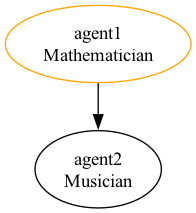

In [13]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-10 17:43:19][INFO]: Self-defined relationships
 
[2024-12-10 17:43:19][INFO]: Succesfully add member agent3


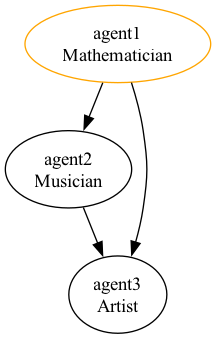

In [14]:
g.add_member(
        Agent(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", dify_access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),[("agent1","agent3"),("agent2","agent3")]
    )

Image(g.draw_relations())

 
[2024-12-10 17:43:23][INFO]: Self-defined relationships
 
[2024-12-10 17:43:23][INFO]: Successfully delete member agent2


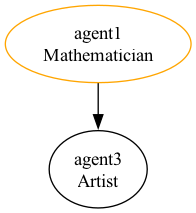

In [15]:
g.delete_member("agent2")
Image(g.draw_relations())

 
[2024-12-10 17:43:27][INFO]: handoff from agent1 to agent3 by using auto2 mode


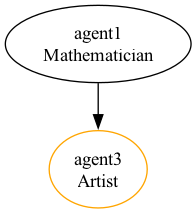

In [16]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

## Task

In [ ]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# tools
def get_my_mood():
    """Get the mood of user."""
    return "I am so happy today!"

def get_current_time():
    """Get the current time."""
    return "It is 12:00 PM now."

def get_weather():
    """ Get the weather."""
    return "It is sunny today."

# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name= "agent1", role="Personal Assistant", description="Transfer to me if you need help with personal stuff.",
              model_client=model_client,tools=[get_my_mood,get_current_time,get_weather]),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

 
[2024-12-10 18:03:14][INFO]: All agents are fully connected


In [53]:
task = "what kind of music is good for right now consider today's weather and my current mood?"
_ = g.task(task,model="gpt-4o-mini",strategy="sequential",entry_agent="agent1")

 
[2024-12-10 18:04:03][INFO]: Start task: what kind of music is good for right now consider today's weather and my current mood?
 
[2024-12-10 18:04:03][INFO]: ===> Step 1
 
[2024-12-10 18:04:03][INFO]: no handoff needed, stay with agent1 judge by order mode
 
[2024-12-10 18:04:11][INFO]: Call agent agent1
 
[2024-12-10 18:04:11][INFO]: Agent agent1 response: By using the tool 'get_weather' with the arguments {}, the result is 'It is sunny today.'.
 
[2024-12-10 18:04:11][INFO]: Agent agent1 response: By using the tool 'get_my_mood' with the arguments {}, the result is 'I am so happy today!'.
 
[2024-12-10 18:04:11][INFO]: Agent agent1 response: Given that it is sunny today and you are feeling happy, I recommend upbeat and cheerful music. Genres like indie pop, reggae, or light electronic music can enhance your mood and complement the beautiful weather. Songs with positive lyrics or lively rhythms would be perfect for this combination. Would you like specific song recommendations?
 
[